/nix/store/djbb9b9f6z7h07qm3jaykcy82pbai4zb-python3-3.11.8-env/lib/python3.11/site-packages/osgeo/gdal.py:349: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


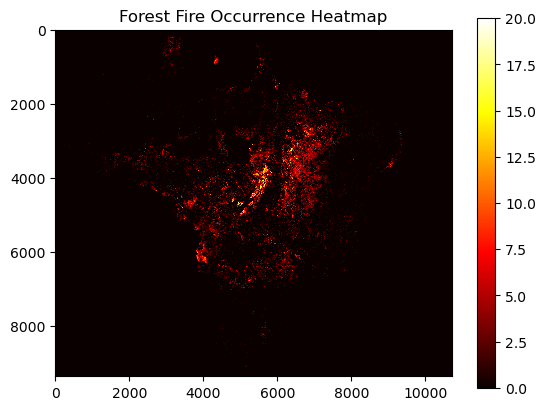

In [2]:
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
    
def read_geotiff(file_path):
    dataset = gdal.Open(file_path)
    band = dataset.GetRasterBand(1)
    array = band.ReadAsArray()
    return np.array(array)

years = range(2003, 2023)  # 2003 to 2022
burn_areas = []

for year in years:
    path = f"./barea/barea{year}_bra.tif"
    burn_areas.append(read_geotiff(path))

combined_burn_areas = sum(burn_areas)

plt.imshow(combined_burn_areas, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Forest Fire Occurrence Heatmap')
plt.show()


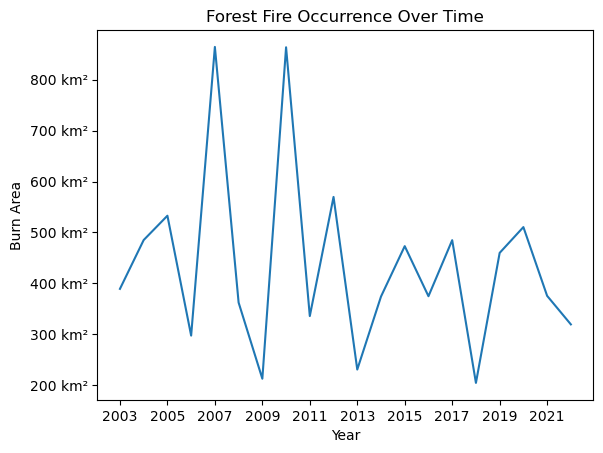

In [9]:
from matplotlib.ticker import FuncFormatter

burn_amounts = [np.sum(burn_area) for burn_area in burn_areas]
plt.plot(years, burn_amounts)
plt.title('Forest Fire Occurrence Over Time')
plt.xlabel('Year')
plt.ylabel('Burn Area')

plt.locator_params(axis="both", integer=True)

def m2_to_km2(y, pos):
    # Convert the value to square kilometers (500 m² = 0.0005 km²)
    return '{:.0f} km²'.format(y * 500 / 1e6)

plt.gca().yaxis.set_major_formatter(FuncFormatter(m2_to_km2))


plt.xticks(years[::2])

# one y unit is 500 m^2, add labels to y axis for km


plt.show()

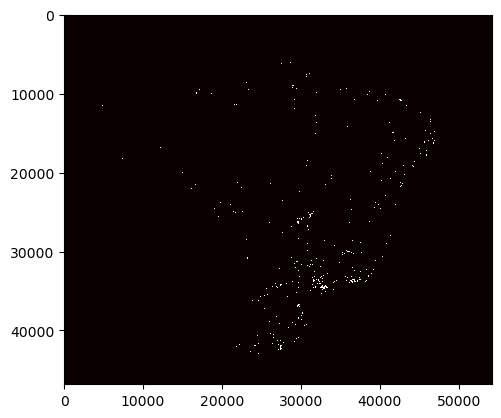

In [5]:
path = "./population.tif"
population = read_geotiff(path)

plt.imshow(population, cmap='hot', interpolation='nearest')
plt.show()


In [6]:
population.shape


(46814, 54172)

In [7]:
burn_areas[0].shape

(9365, 10721)

In [1]:
# from scipy.ndimage import gaussian_filter

# blurred = gaussian_filter(population, sigma=1)

# plt.imshow(blurred, cmap='hot', interpolation='nearest')
# plt.show()